In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database


# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
inspector = inspect (engine)
inspector.get_table_names ()
columns = inspector.get_columns('Measurement')
for c in columns:
    print (c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [22]:
# Calculate the date 1 year ago from the last data point in the database
year_ago=dt.date(2017, 10, 28)-dt.timedelta(days=365)
data_precipitation=session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date>year_ago).\
order_by(Measurement.date).all()
data_precipitation

[('2016-10-29', 0.0),
 ('2016-10-29', 0.02),
 ('2016-10-29', 0.26),
 ('2016-10-29', 0.01),
 ('2016-10-29', 0.1),
 ('2016-10-29', 0.25),
 ('2016-10-30', 0.24),
 ('2016-10-30', 0.1),
 ('2016-10-30', 0.14),
 ('2016-10-30', 0.0),
 ('2016-10-30', 0.16),
 ('2016-10-30', 0.95),
 ('2016-10-31', 0.03),
 ('2016-10-31', 0.03),
 ('2016-10-31', 0.0),
 ('2016-10-31', None),
 ('2016-10-31', 0.13),
 ('2016-10-31', 0.07),
 ('2016-10-31', 1.35),
 ('2016-11-01', 0.0),
 ('2016-11-01', 0.01),
 ('2016-11-01', 0.0),
 ('2016-11-01', 0.01),
 ('2016-11-01', 0.1),
 ('2016-11-01', 0.09),
 ('2016-11-02', 0.0),
 ('2016-11-02', 0.0),
 ('2016-11-02', 0.0),
 ('2016-11-02', 0.0),
 ('2016-11-02', 0.0),
 ('2016-11-02', 0.04),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.02),
 ('2016-11-04', 0.0),
 ('2016-11-04', 0.0),
 ('2016-11-04', 0.0),
 ('2016-11-04', None),
 ('2016-11-04', 0.0),
 ('2016-11-04', 0.0),
 ('2016-11-04', 0.06),
 ('2016-11-

In [25]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(data_precipitation)
precipitation.set_index('date').head()

,prcp
date,
2016-10-29,0.00
2016-10-29,0.02
2016-10-29,0.26
2016-10-29,0.01
2016-10-29,0.10


Text(0,0.5,'Point')

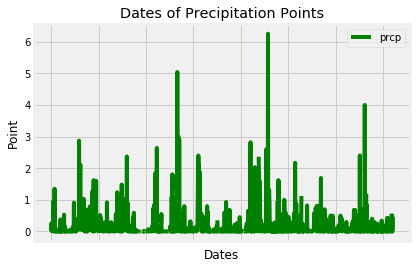

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation.plot('date', 'prcp', color="green")
plt.title("Dates of Precipitation Points")
plt.xlabel("Dates")
plt.ylabel("Point")

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe(percentiles=None, include=None, exclude=None)

,prcp
count,1634.000000
mean,0.165324
std,0.431752
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


![describe](Images/describe.png)

In [28]:
# Design a query to show how many stations are available in this dataset?

stations=session.query(func.count(Station.station)).all()
stations

[(9)]

In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
year_ago=dt.date(2017, 10, 28)-dt.timedelta(days=365)
data_temp=session.query(Station.station,func.count(Measurement.tobs)).\
filter(Measurement.date>=year_ago).\
group_by(Station.station).\
order_by(func.count(Measurement.date).desc()).all()
data_temp

[('USC00511918', 1809),
 ('USC00513117', 1809),
 ('USC00514830', 1809),
 ('USC00516128', 1809),
 ('USC00517948', 1809),
 ('USC00518838', 1809),
 ('USC00519281', 1809),
 ('USC00519397', 1809),
 ('USC00519523', 1809)]

In [52]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
print (session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Station.station=='USC00519281').all())

[(53.0, 87.0, 73.09795396419437)]


In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_observations=session.query(Station.station,func.count(Measurement.tobs)).\
    filter(Station.station==Measurement.station).\
    group_by(Station.station).\
    order_by (func.count(Measurement.tobs).desc()).all()
temp_observations[0][0]

'USC00519281'

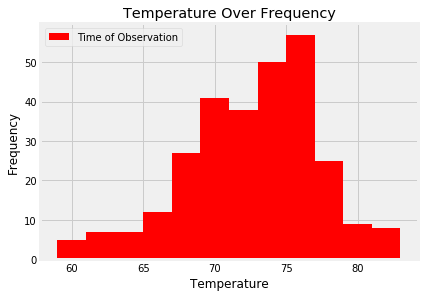

In [58]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_station=temp_observations[0][0]

temperature_data=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station==query_station).\
    filter(Measurement.date>=year_ago).\
    order_by(Measurement.tobs.desc()).all()
frequency = [temperature_data[0] for temperature_data in temperature_data]
temperature =[temperature_data[1] for temperature_data in temperature_data]
df = pd.DataFrame(temperature_data, columns=['Temperature', 'Frequency'])
df.set_index('Temperature',inplace=True)
df.plot.hist(color="red",bins=12)
plt.xlabel("Temperature")
plt.legend(["Time of Observation"])
plt.tight_layout()

plt.title("Temperature Over Frequency")
plt.ylabel("Frequency")
plt.show()

![precipitation](Images/station-histogram.png)

In [59]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [62]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
vacation_temp = (calc_temps('2017-08-15', '2017-08-22'))

# function usage example
print(vacation_temp)

[(70.0, 78.29032258064517, 85.0)]


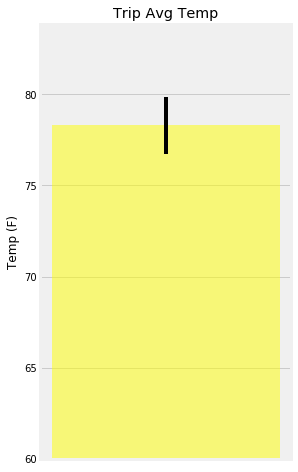

In [64]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

lower = vacation_temp[0][1]-vacation_temp[0][0]
upper = vacation_temp[0][2]-vacation_temp[0][1]

plt.figure(figsize=(4,8))
plt.bar(0,vacation_temp[0][1],yerr=[upper-lower], color="yellow",alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)

plt.show()

In [68]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rainfall_per_station(start_date, end_date):
    return session.query(Measurement.station,
                         Measurement.prcp.label('rainfall'),
                         Station.latitude,
                         Station.longitude,
                         Station.elevation).\
                            group_by(Measurement.station).\
                            join(Station, Measurement.station ==Station.station).\
                            filter(Measurement.date >=start_date).\
                            filter(Measurement.date <=end_date).\
                            order_by('rainfall DESC').all()

rainfall_per_station('2017-08-15', '2017-08-22')

C:\Users\Kathleen\Anaconda3\envs\PythonData\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'rainfall DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00516128', 0.5, 21.3331, -157.8025, 152.4),
 ('USC00519281', 0.06, 21.45167, -157.84888999999998, 32.9),
 ('USC00514830', 0.02, 21.5213, -157.8374, 7.0),
 ('USC00519397', 0.0, 21.2716, -157.8168, 3.0),
 ('USC00519523', 0.0, 21.33556, -157.71139, 19.5)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


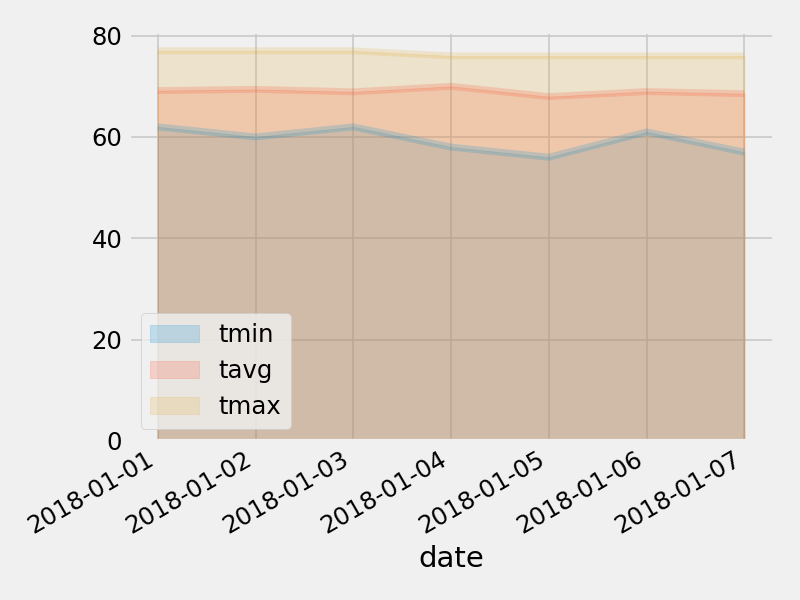

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
